/Users/paytone/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning:

Data Validation extension is not supported and will be removed



(0.30000000000000004, 7.300000000000001)

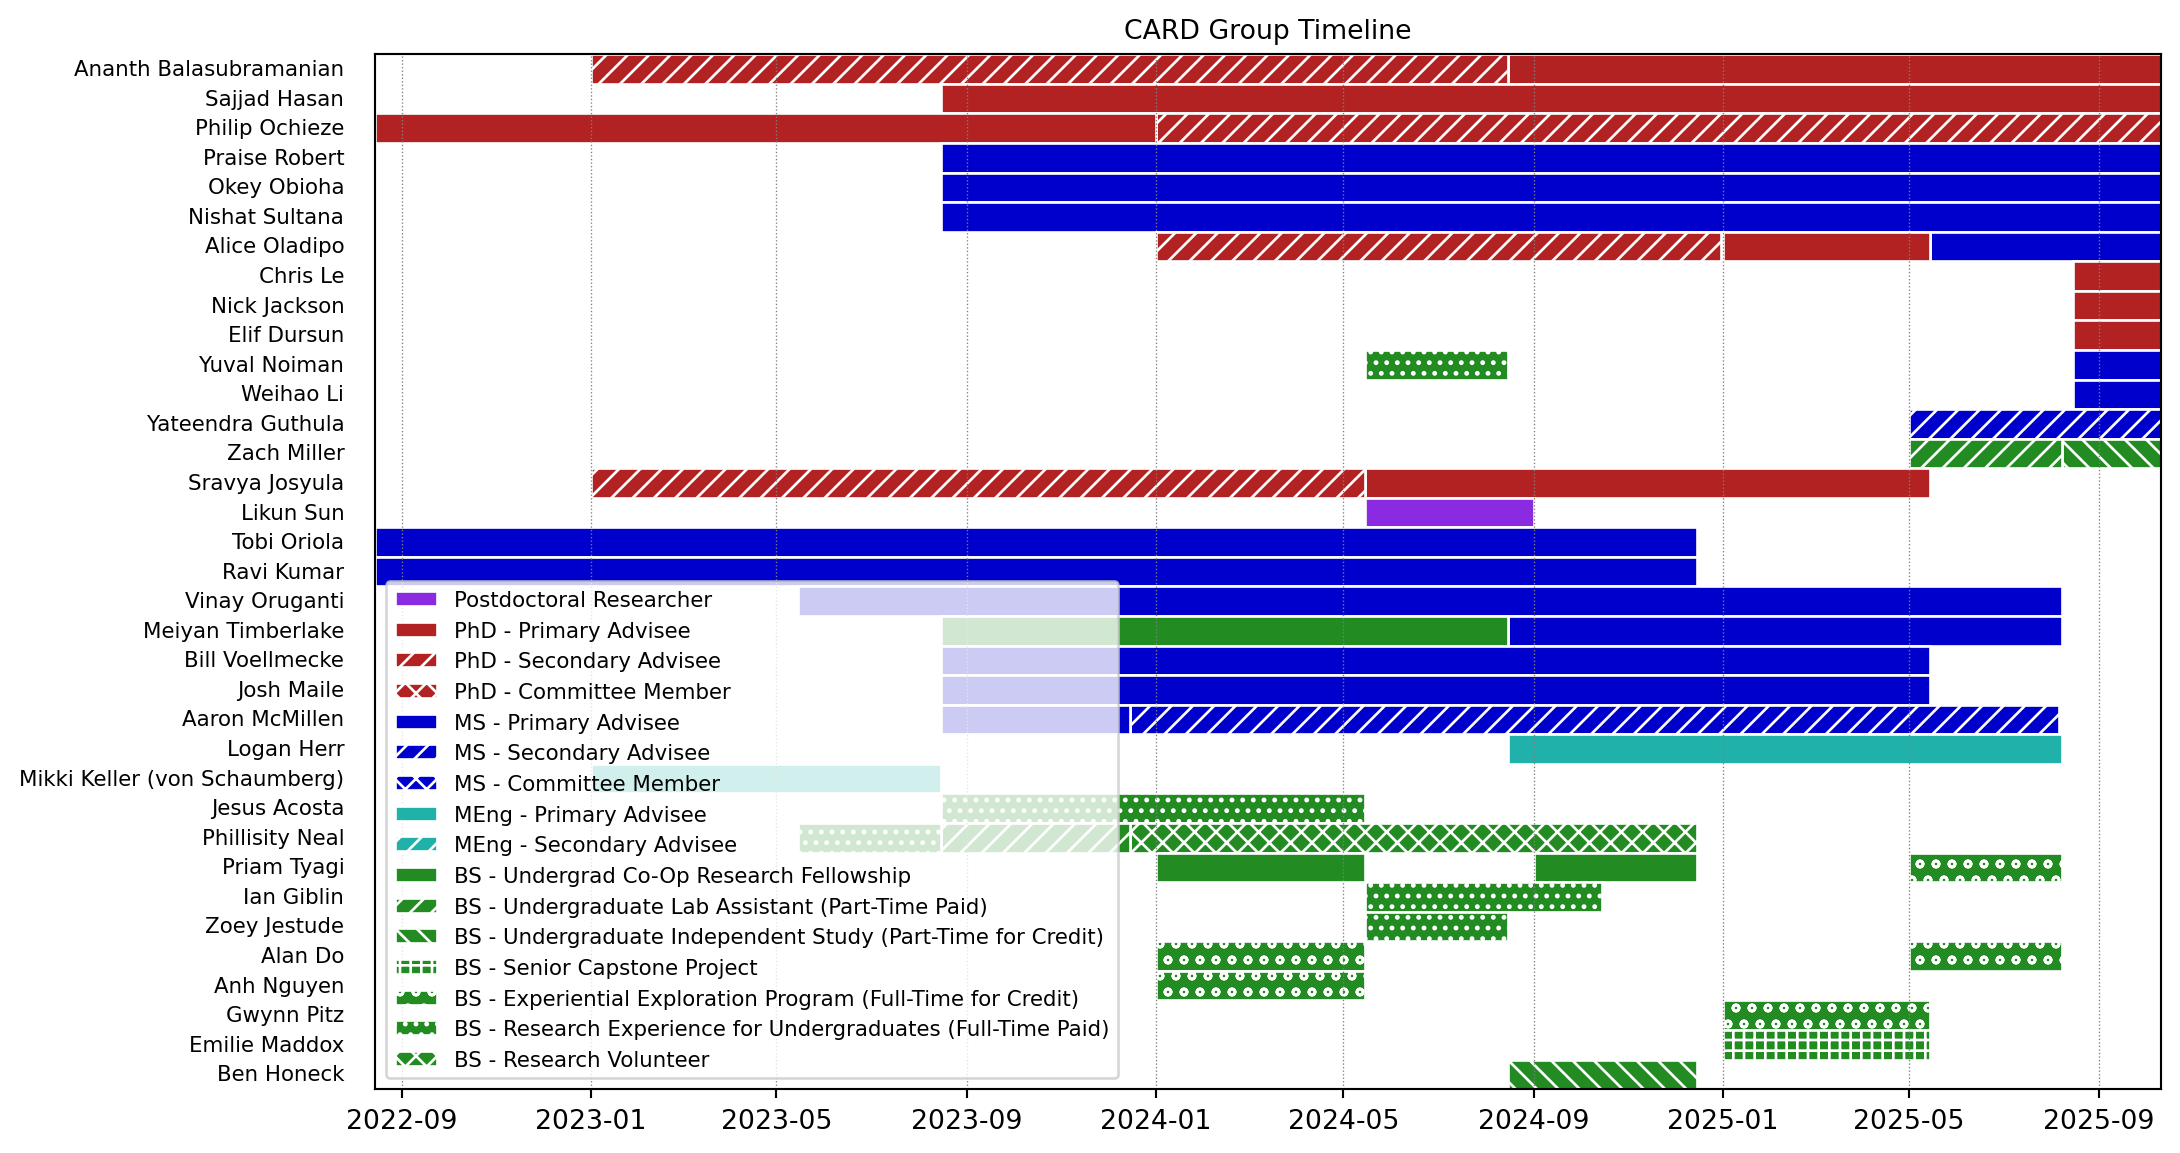

In [1]:
#| echo: false
#| eval: true

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

filename = "../../CARD Group Timeline.xlsx"

df = pd.read_excel(filename, sheet_name="People")
df.drop(0, inplace=True)
df.reset_index(inplace=True, drop=True)

names = df['Display Name'].values

# Get the current group members and alumni
current_group_member_indices = df[df.apply( \
    lambda row: row.astype(str).str.contains('current').any(),
      axis=1)].index.tolist()
alumni_indices = df[~df.index.isin(current_group_member_indices)].index.tolist()

current_group_members = df.loc[current_group_member_indices, 'Display Name']
alumni = df.loc[alumni_indices, 'Display Name']

current_index = np.zeros([len(names), 1])
current_index[current_group_member_indices] = 1
alumni_index = np.zeros([len(names), 1])
alumni_index[alumni_indices] = 1
df['current'] = current_index
df['alumni'] = alumni_index
del current_index, alumni_index

# Convert Finish and Start columns to datetime
for col in np.ravel([[col for col in df.columns if 'Finish' in col],
              [col for col in df.columns if 'Start' in col]]): 
    df[col] = pd.to_datetime(df[col], errors='coerce', format='%Y-%m-%d %H:%M:%S')

# Replace 'current' with today's date in the DataFrame
# This assumes 'current' is used in the 'Ultimate Role Finish' column
df = df.mask(df == 'current', pd.to_datetime(pd.Timestamp.today()))

# Fill in remaining dates with current date time
for col in np.ravel([[col for col in df.columns if 'Finish' in col],
              [col for col in df.columns if 'Start' in col]]):
    df.loc[df[col].isna(),col] = \
        pd.to_datetime(pd.Timestamp.today())


#| output: false

rolehistory = ['Ultimate', 'Penultimate', 'Antepenultimate', 'Preantepenultimate', 'Propreantepenultimate', 'Ultrasuprapropreantepenultimate']

time_with_group = time_data = pd.to_timedelta(pd.Series(np.zeros(np.shape(names))), unit='s')
for role in rolehistory:
    time_with_group += pd.to_datetime(
        df['{0} Role Finish'.format(role)]) \
          - pd.to_datetime(df['{0} Role Start'.format(role)]
                           )
time_with_group = time_with_group / (np.timedelta64(1, 'D'))
df['time_with_group'] = time_with_group
x = []
nameroleindex = []
rankvalue = []
for n in np.arange(0,len(names)):
    groupmember = df.loc[n]
    nroles = 0
    for role in rolehistory:
        if groupmember['{0} Degree-Role'.format(role)] == 'Postdoctoral Researcher':
            color = 'blueviolet'
            hatch = None
            rank = 1000
        elif groupmember['{0} Degree-Role'.format(role)] == 'PhD - Primary Advisee':
            color = 'firebrick'
            hatch = None
            rank = 750
        elif groupmember['{0} Degree-Role'.format(role)] == 'PhD - Secondary Advisee':
            color = 'firebrick'
            hatch = '///'
            rank = 350
        elif groupmember['{0} Degree-Role'.format(role)] == 'PhD - Committee Member':
            color = 'firebrick'
            hatch = 'XXX'
            rank = 225
        elif groupmember['{0} Degree-Role'.format(role)] == 'MS - Primary Advisee':
            color = 'mediumblue'
            hatch = None 
            rank = 500
        elif groupmember['{0} Degree-Role'.format(role)] == 'MS - Secondary Advisee':
            color = 'mediumblue'
            hatch = '///'
            rank = 175
        elif groupmember['{0} Degree-Role'.format(role)] == 'MS - Committee Member':
            color = 'mediumblue'
            hatch = 'XXX'
            rank = 75
        elif groupmember['{0} Degree-Role'.format(role)] == 'MEng - Primary Advisee':
            color = 'lightseagreen'
            hatch = None
            rank = 225
        elif groupmember['{0} Degree-Role'.format(role)] == 'MEng - Secondary Advisee':
            color = 'lightseagreen'
            hatch = '///' 
            rank = 2
        elif groupmember['{0} Degree-Role'.format(role)] == 'BS - Undergrad Co-Op Research Fellowship':
            color = 'forestgreen'
            hatch = None
            rank = 200
        elif groupmember['{0} Degree-Role'.format(role)] == 'BS - Undergraduate Part-Time Research (Paid)':
            color = 'forestgreen'
            hatch = '///' 
            rank = 20
        elif groupmember['{0} Degree-Role'.format(role)] == 'BS - Undergraduate Independent Study Researcher (Part Time for Credit)':
            color = 'forestgreen'
            hatch = '\\\\\\'
            rank = 10
        elif groupmember['{0} Degree-Role'.format(role)] == 'BS - Senior Capstone Project':
            color = 'forestgreen'
            hatch = '|||---'
            rank = 30
        elif groupmember['{0} Degree-Role'.format(role)] == 'BS - Experiential Exploration Program Researcher (Full-Time for Credit)':
            color = 'forestgreen'
            hatch = 'oo'
            rank = 75
        elif groupmember['{0} Degree-Role'.format(role)] == 'BS - Research Experience for Undergraduates (Full-Time Paid)':
            color = 'forestgreen'
            hatch = '...' 
            rank = 150
        elif groupmember['{0} Degree-Role'.format(role)] == 'BS - Research Volunteer':
            color = 'forestgreen'
            hatch = 'XXX'
            rank = 1
        else:
            color = 'magenta'
            hatch = '***'
            rank = 1
        
        nameroleindex.append(n)
        
        if role == 'Ultimate':
            rankvalue.append(rank)
     
        if groupmember['{0} Role Finish'.format(role)] == 'current':
            finish = np.datetime64('today', 'D')
        else:
            finish = pd.to_datetime(groupmember['{0} Role Finish'.format(role)]).to_numpy()
        
        start = pd.to_datetime(groupmember['{0} Role Start'.format(role)]).to_numpy()
        
        #print(start, finish)
            
        x.append([[color, hatch], 
                  start,
                  finish])
        
        nroles += 1
current = 4999 * df['current'].values + 1

value = current + rankvalue + 0.5 * time_with_group
nameroleindex = np.array(nameroleindex) 
x = np.array(x, dtype=object)
# Sort in the order we want to plot

df['rankvalue'] = rankvalue

df['value'] = value
order = np.flipud(np.argsort(np.array(value)))
df['order'] = order

dfn = df.sort_values(by='value', ascending=False)
dfn.reset_index(inplace=True, drop=True)

# Sort the nameroleindex and x
n = len(names)
bar = []
orderind = np.argsort(order)
for i in np.arange(0, n):
    loc = np.where(orderind == i)[0]
    loc2 = np.where(nameroleindex == loc)[0]

    for j in loc2:
        bar.append(x[j,0:3])
from matplotlib.patches import Patch

h = 0.2

group_start = np.datetime64('2022-08-15')

# Create a mapping from label to y-position
#labels = df['Label'].unique()
#label_to_y = {label: i for i, label in enumerate(reversed(labels))}  # Top-down   
names_sorted = dfn['Display Name'].values

fig, ax = plt.subplots(figsize=(12, len(names_sorted) * h))
ndex = order[nameroleindex]
j = len(nameroleindex) - 1
xrow = 0
for n in np.arange(0,len(names_sorted)):
    name = names_sorted[n]
    
    for i in np.arange(0, 6):
        ax.barh(y=(len(names)+1 - n) * h,
                width=(bar[xrow][2] - bar[xrow][1]),
                left=bar[xrow][1],
                height=h,
                align='center',
                color=bar[xrow][0][0],
                edgecolor='white',
                hatch=bar[xrow][0][1])
        xrow += 1

    ax.text(group_start-20, (len(names)+1 - n) * h, name, va='center', ha='right', fontsize=8)

legend_elements = [
    Patch(label='Postdoctoral Researcher',
        facecolor = 'blueviolet',
        edgecolor='white', 
        hatch = None),
    Patch(label='PhD - Primary Advisee',
        facecolor = 'firebrick',
        edgecolor='white',
        hatch = None),
    Patch(label='PhD - Secondary Advisee',
        facecolor = 'firebrick',
        edgecolor='white',
        hatch = '///'),
    Patch(label='PhD - Committee Member',
        facecolor = 'firebrick',
        edgecolor='white',
        hatch = 'XXX'),
    Patch(label='MS - Primary Advisee',
        facecolor = 'mediumblue',
        edgecolor='white',
        hatch = None ),
    Patch(label='MS - Secondary Advisee',
        facecolor = 'mediumblue',
        edgecolor='white',
        hatch = '///'),
    Patch(label='MS - Committee Member',
        facecolor = 'mediumblue',
        edgecolor='white',
        hatch = 'XXX'),
    Patch(label='MEng - Primary Advisee',
        facecolor = 'lightseagreen',
        edgecolor='white',
        hatch = None),
    Patch(label='MEng - Secondary Advisee',
        facecolor = 'lightseagreen',
        edgecolor='white',
        hatch = '///' ),
    Patch(label='BS - Undergrad Co-Op Research Fellowship',
        facecolor = 'forestgreen',
        edgecolor='white',
        hatch = None),
    Patch(label='BS - Undergraduate Lab Assistant (Part-Time Paid)',
        facecolor = 'forestgreen',
        edgecolor='white',
        hatch = '///' ),
    Patch(label='BS - Undergraduate Independent Study (Part-Time for Credit)',
        facecolor = 'forestgreen',
        edgecolor='white',
        hatch = '\\\\\\'),
    Patch(label='BS - Senior Capstone Project',
        facecolor = 'forestgreen',
        edgecolor='white',
        hatch = '|||---'),
    Patch(label='BS - Experiential Exploration Program (Full-Time for Credit)',
        facecolor = 'forestgreen',
        edgecolor='white',
        hatch = 'oo'),
    Patch(label='BS - Research Experience for Undergraduates (Full-Time Paid)',
        facecolor = 'forestgreen',
        edgecolor='white',
        hatch = '...'),
    Patch(label='BS - Research Volunteer',
        facecolor = 'forestgreen',
        edgecolor='white',
        hatch = 'XXX')
        ]

ax.legend(handles=legend_elements, loc='lower left', fontsize=8)
plt.title('CARD Group Timeline', fontsize=10)
plt.grid(which='both', axis='both', linestyle=':', linewidth='0.5', color='gray')
plt.yticks([])
plt.ylim([1.5 * h, (len(names) + 1 + 0.5)* h])
